In [2]:
import pandas as pd
import matplotlib.pyplot as plt
daFile = pd.read_csv("weather.csv")   #read the csv file



# Task 1: Total amount of precipitation 

In [6]:
groupByLoc = daFile.groupby('location') #create a new dataframe grouped by location

seattle= groupByLoc.get_group('Seattle') #create a new dataframe with the Seattle group
newyork= groupByLoc.get_group('New York') #create a new dataframe with the New York group
precipitation_sea = sum(seattle['precipitation']) #get sum of the coloumn precipitation
precipitation_ny  = sum(newyork['precipitation'])

print("The total precipitation of Seattle is  : " +str(precipitation_sea))
print("The total precipitation of New York is : " +str(precipitation_ny))


The total precipitation of Seattle is  : 4426.000000000008
The total precipitation of New York is : 4178.6000000000095


# Task 2: Average number of days of sun

In [9]:
sunny = daFile[daFile['weather'] == 'sun']
groupByLoc = sunny.groupby('location')

seattle= groupByLoc.get_group('Seattle') 
newyork= groupByLoc.get_group('New York') 

avg_sun_seattle = (daFile['weather'].count()/seattle['weather'].count()) #total rows/rows having sun
avg_sun_ny = (daFile['weather'].count()/newyork['weather'].count())
print("Average number of days per year in Seattle  : " + str(avg_sun_seattle))
print("Average number of days per year in New York : " + str(avg_sun_ny))



Average number of days per year in Seattle  : 4.092436974789916
Average number of days per year in New York : 3.04375


# Task 3: Highest maximum temperature

In [43]:
print(daFile['temp_max'].max())  #get the maximum temperature

#display the details of the maximum temparature namely, city and date

print("The highest temperature in the dataset is " + 
      str(daFile['temp_max'].max()) + " which occured on " + 
      str(daFile.iloc[daFile['temp_max'].idxmax(), [0,1]][1]) + " at " + 
      str(daFile.iloc[daFile['temp_max'].idxmax(), [0,1]][0]))


37.8
The highest temperature in the dataset is 37.8 which occured on July 18, 2013 at New York


# Task 4: Average windspeed for each month

Average windpeed for each month in Seattle  : 
month_num
1     3.138710
2     3.786726
3     3.579839
4     3.524167
5     3.120161
6     3.130833
7     2.911290
8     2.750806
9     2.963333
10    2.939516
11    3.482500
12    3.618548
Name: wind, dtype: float64
Average windpeed for each month in New York : 
month_num
1     5.787097
2     5.594690
3     5.637097
4     5.665833
5     4.419355
6     4.548333
7     4.369355
8     4.116129
9     4.265833
10    5.035484
11    5.171667
12    4.972581
Name: wind, dtype: float64


Text(0.5, 0, 'MONTH')

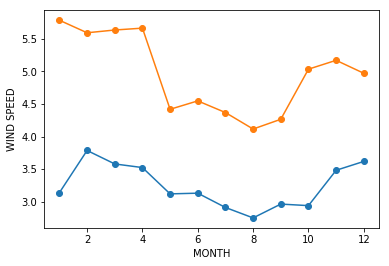

In [13]:
groupByLoc = daFile.groupby('location')

seattle= groupByLoc.get_group('Seattle') 
newyork= groupByLoc.get_group('New York') 
#print(daFile.groupby('month_num')['wind'].mean)
seattle_byMonth = seattle.groupby('month_num')
ny_byMonth = newyork.groupby('month_num')
print("Average windpeed for each month in Seattle  : ")
print((seattle_byMonth['wind'].mean()))
print("Average windpeed for each month in New York : ")
print((ny_byMonth['wind'].mean()))


plt.plot( seattle_byMonth['wind'].mean(), marker='o')
plt.plot( ny_byMonth['wind'].mean(), marker='o')
plt.ylabel('WIND SPEED')
plt.xlabel('MONTH')


# Task 5: 5 Days with most snowfall

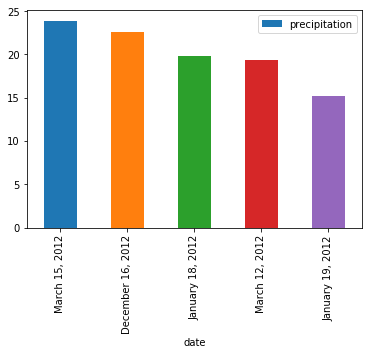

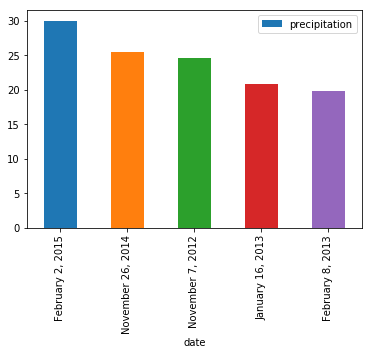

In [14]:
groupByLoc = daFile.groupby('location')

seattle= groupByLoc.get_group('Seattle') 
newyork= groupByLoc.get_group('New York') 

seattle_bySnow = seattle[seattle['weather'] == 'snow'].sort_values(by=['precipitation'], ascending=False).head()
ny_bySnow = newyork[newyork['weather'] == 'snow'].sort_values(by=['precipitation'], ascending=False).head()


#seattle.plot.bar()

seattle_bySnow.plot.bar(x='date', y='precipitation')
ny_bySnow.plot.bar(x='date', y='precipitation')